Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(4531, 35)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    3975
1.0     556
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [13]:
# x = sm.add_constant(x)

In [14]:
us = TomekLinks()
columns = x.columns
us_data_x, us_data_y = us.fit_sample(x, y)
us_data_x = pd.DataFrame(data=us_data_x, columns=columns )
us_data_y= pd.DataFrame(data=us_data_y, columns=['Would_not_stay_in_the_neighborhood'])

# we can Check the numbers of our data
print("length of undersampled data is ",len(us_data_x))
print("Number of people who would not stay in the neighborhood in undersampled data",
      len(us_data_y[us_data_y['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood",
      len(us_data_y[us_data_y['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in undersampled data is ",
      len(us_data_y[us_data_y['Would_not_stay_in_the_neighborhood']==1])/len(us_data_x))
print("Proportion of subscription data in undersampled data is ",
      len(us_data_y[us_data_y['Would_not_stay_in_the_neighborhood']==0])/len(us_data_x))

length of undersampled data is  4448
Number of people who would not stay in the neighborhood in undersampled data 556
Number of people who would stay in the neighborhood 3892
Proportion of 'Would_not_stay_in_the_neighborhood' in undersampled data is  0.125
Proportion of subscription data in undersampled data is  0.875


In [15]:
us_data_x

,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,Time_living_in_barri_LESS THAN 10 YEARS,Time_living_in_barri_MORE THAN 10 YEARS,Barri_evolution_IT IS THE SAME,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1,0.0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,1,1.0,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
2,1,0.0,1,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0.0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,1,0.0,1,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4444,0,0.0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4445,1,1.0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4446,1,0.0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [16]:
us_data_y['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(us_data_y,us_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306033
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.188      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2802.4730  
Date:                  2021-04-15 21:29                      BIC:                 3058.4814  
No. Observations:      4448                                  Log-Likelihood:      -1361.2    
Df Model:              39                                    LL-Null:             -1675.9    
Df Residuals:          4408                                  LLR p-value:         1.4049e-107
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [18]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         8.682426e-01
Barri_transport_GOOD                            8.674093e-01
Owns_a_car                                      7.945903e-01
BCN_over_barri_evolution                        7.236976e-01
Barri_evolution_IT IS THE SAME                  6.262682e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.844736e-01
Gender                                          5.624031e-01
MUNICIPAL POLICE_GOOD                           5.498465e-01
CIRCULATION_GOOD                                5.112183e-01
Monthly_family_income_< 1000 EUROS              4.543563e-01
BCN_over_barri_future                           3.639006e-01
PUBLIC LIGHTING_GOOD                            3.256244e-01
Barri_evolution_IT IS WORSE                     3.015678e-01
STREETS CLEANING_GOOD                           2.266322e-01
MUNICIPAL MARKETS_GOOD                          2.083108e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.064441e-01
Monthly_family_income_20

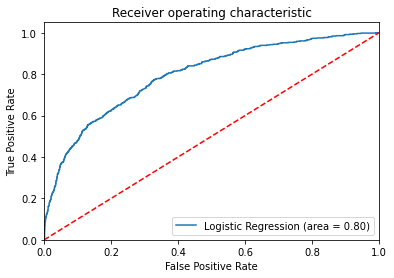

In [19]:
logit_roc_auc = roc_auc_score(us_data_y, result.predict(us_data_x))
fpr, tpr, thresholds = roc_curve(us_data_y, result.predict(us_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['House_size_> 150 M2', 'House_size_< 50 M2', 'House_size_51-100 M2', 'BCN_over_barri_transport',
         'BCN_over_barri_future', 'MUNICIPAL POLICE_GOOD']:
    del os_data_x[i]

In [ ]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
del os_data_x['Gender']

In [ ]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
del os_data_x['Living_alone']

In [ ]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
print(result.get_margeff().summary())

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(us_data_y, result.predict(us_data_x))
fpr, tpr, thresholds = roc_curve(us_data_y, result.predict(us_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()